In [1]:
import pandas as pd
from pycaret.datasets import get_data

In [2]:
data = get_data('pycaret_downloads')

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    90 non-null     object
 1   Total   90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()
data = data.asfreq('D')
data

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542
...,...
2021-10-01,7115
2021-10-02,3903
2021-10-03,5038


<AxesSubplot:xlabel='Date'>

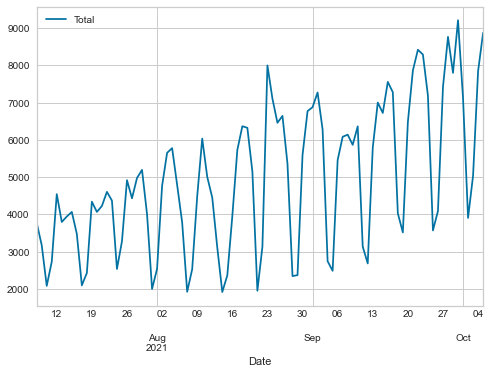

In [32]:
# plot the data
data.plot()

In [33]:
# with functional API
from pycaret.time_series import *
setup(data, fh = 7, fold = 3, session_id = 123)
# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(90, 1)"
2,Missing Values,False
3,Transformed Train Set,"(83,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [34]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,90.0
1,Summary,Statistics,Mean,,4960.366667
2,Summary,Statistics,Median,,4776.5
3,Summary,Statistics,Standard Deviation,,1939.000116
4,Summary,Statistics,Variance,,3759721.448315
5,Summary,Statistics,Kurtosis,,-0.920113
6,Summary,Statistics,Skewness,,0.22622
7,Summary,Statistics,# Distinct Values,,89.0
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",460.125833


In [35]:
# functional API
plot_model(plot = 'ts')
# object-oriented API
#exp.plot_model(plot = 'ts')

In [36]:
# cross-validation plot
plot_model(plot = 'cv')

In [37]:
# ACF plot
plot_model(plot = 'acf')

In [38]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [39]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

In [40]:
# functional API
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
auto_arima,Auto ARIMA,531.9161,626.2090,0.0911,0.0916,0.8490,0.8632,1.0567
arima,ARIMA,568.4974,687.2509,0.0957,0.0975,0.9085,0.8316,0.0133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,571.1749,672.9608,0.1022,0.0990,0.9132,0.8368,0.0167
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,583.1120,715.5584,0.1014,0.0996,0.9318,0.8204,0.3200
theta,Theta Forecaster,542.3628,687.9873,0.0944,0.1013,0.8699,0.8162,0.0133
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,604.1178,706.2955,0.1052,0.1041,0.9669,0.8196,0.0233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,614.7098,728.1451,0.1055,0.1044,0.9818,0.8137,0.3133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,624.8851,752.5383,0.1086,0.1073,0.9963,0.8052,0.0200
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,632.7151,746.7218,0.1081,0.1075,1.0093,0.8079,0.0200
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,632.7142,746.7212,0.1081,0.1075,1.0093,0.8079,0.0133


In [41]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-07 00:00:00,579.0242,655.8335,0.1347,0.1232,0.9371,0.8212
1,2021-09-14 00:00:00,641.3026,816.9084,0.1024,0.1088,1.0449,0.7413
2,2021-09-21 00:00:00,870.3595,987.0935,0.1183,0.1250,1.3490,0.7477
Mean,NaT,696.8954,819.9451,0.1185,0.1190,1.1104,0.7701
SD,NaT,125.2650,135.2534,0.0132,0.0073,0.1744,0.0363


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [42]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-07 00:00:00,649.0172,711.2958,0.1351,0.1270,1.0504,0.7897
1,2021-09-14 00:00:00,585.7204,718.3293,0.0986,0.1071,0.9544,0.7999
2,2021-09-21 00:00:00,654.0680,707.8493,0.0942,0.0991,1.0138,0.8703
Mean,NaT,629.6019,712.4915,0.1093,0.1111,1.0062,0.8200
SD,NaT,31.0973,4.3612,0.0183,0.0117,0.0396,0.0358


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.07052367291265604,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.2772015819815348,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [43]:
plot_model(best, plot = 'forecast')

In [44]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [45]:
# in-sample plot
plot_model(best, plot = 'insample')

In [46]:
# residuals plot
plot_model(best, plot = 'residuals')

In [47]:
# diagnostics plot
plot_model(best, plot = 'diagnostics')

In [48]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 90)

2021-10-06     8392.9201
2021-10-07     9061.0284
2021-10-08     7701.1467
2021-10-09     4390.7557
2021-10-10     4972.7565
                 ...    
2021-12-30    13175.0931
2021-12-31    11815.2114
2022-01-01     8504.8204
2022-01-02     9086.8211
2022-01-03    12086.9375
Freq: D, Name: Total, Length: 90, dtype: float64

In [49]:
# save the model
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
           information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
           max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
           n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
           random_state=123, scoring='mse', scoring_args=None, seasonal=True,
           seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
           start_Q=1, start_p=2, start_params=None, ...),
 'my_best_model.pkl')

In [53]:
#from pycaret.regression import *
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]
# compare top 3
compare_models(include=tuned_top5)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
0,Auto ARIMA,531.9161,626.2090,0.0911,0.0916,0.8490,0.8632,1.1400
1,ARIMA,531.9161,626.2090,0.0911,0.0916,0.8490,0.8632,0.0767
2,LGBMRegressor,571.1749,672.9608,0.1022,0.0990,0.9132,0.8368,0.0267
3,ExtraTreesRegressor,583.1120,715.5584,0.1014,0.0996,0.9318,0.8204,0.3433
4,Theta Forecaster,542.3628,687.9873,0.0944,0.1013,0.8699,0.8162,0.0133


AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=123, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)